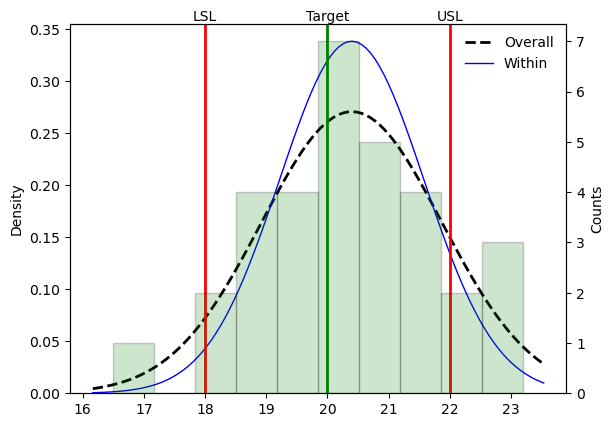

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics as stat

# Generate or load your data
group = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8]

data = [18.5, 21.2, 19.4, 16.5, 17.9, 19.0, 20.3, 21.2, 19.6, 19.8, 20.4, 20.5, 
          22.2, 21.5, 20.8, 20.3, 19.1, 20.6, 20.8, 21.6, 22.8, 22.2, 23.2, 23.0, 
          19.0, 20.5, 20.3, 19.2, 20.7, 21.0, 20.5, 19.1]


fig,ax1=plt.subplots()
# Add y axis on the right side
ax2=ax1.twinx()

# Create histogram
# Use density=True when creating the histogram to ensure 
# the y-axis represents probability density, which is 
# necessary for a proper comparison with the normal distribution curve
ax2.hist(data, density=False, alpha=0.2, color='g', edgecolor='k')
ax1.hist(data, density=True, alpha=0, color='b')

# Fit a normal distribution to the data
# mu, std = norm.fit(data)
# norm.fit treat the data as population, which is Not for CPK

std = stat.stdev(data)
mean = stat.mean(data)
std_within= std*.8
target=20
usl=22
lsl=18
xlabel=None

# Create x and y values for the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Plot the normal distribution curve for overall
y = norm.pdf(x, mean, std)
ax1.plot(x, y, 'k', linewidth=2,linestyle="dashed",label="Overall")

# Plot the normal distribution curve for overall
y = norm.pdf(x, mean, std_within)
ax1.plot(x, y, 'b', linewidth=1,label="Within")

# Add labels and title
ax2.set_ylabel("Counts")
ax1.set_xlabel(xlabel)
ax1.set_ylabel('Density')
# ax1.set_title(f'Histogram with Normal Distribution Fit (μ={mu:.2f}, σ={std:.2f})')

ax1.axvline(target,color='g',linewidth=2)
ax1.axvline(usl,color='r',linewidth=2)
ax1.axvline(lsl,color='r',linewidth=2)
txt_pos=max(ax1.get_ylim())
ax1.text(target, txt_pos, "Target",horizontalalignment='center', verticalalignment='bottom')
ax1.text(usl, txt_pos, "USL",horizontalalignment='center', verticalalignment='bottom')
ax1.text(lsl, txt_pos, "LSL",horizontalalignment='center', verticalalignment='bottom')
ax1.legend(loc='best', frameon=False)

plt.show()


In [2]:
d2_values = [0,0,
    1.128379167,  # n = 2
    1.692568751,  # n = 3
    2.058751154,  # n = 4
    2.325929342,  # n = 5
    2.534413951,  # n = 6
    2.704000246,  # n = 7
    2.847000307,  # n = 8
    2.970000000,  # n = 9
    3.077999711,  # n = 10
    3.173000000,  # n = 11
    3.258000000,  # n = 12
    3.336000000,  # n = 13
    3.407000000,  # n = 14
    3.472000000,  # n = 15
    3.532000000,  # n = 16
    3.588000000,  # n = 17
    3.640000000,  # n = 18
    3.689000000,  # n = 19
    3.735000000   # n = 20
]

d2=data[1:]+[0]
print(data,d2)
d3=[abs(i-j) for i,j in zip(data, d2)]
stat.mean(d3[:-1])/d2_values[2] 

# this is same to the JMP individual sample size is 1


NameError: name 'data' is not defined

In [12]:
def grouping_by_labels(data_list,grouping_list):
    data=[(i,j) for i,j in zip(grouping_list,data_list)]
    data.sort(key=lambda x:x[0])
    subgroup, res=[],[]
    prev_i=None
    for i,j in data:
        if prev_i != i:
            res.append(subgroup)
            subgroup=[]
        subgroup.append(j)
        prev_i = i
    res.append(subgroup)
    return res[1:]


In [13]:
from utilities import grouping_by_labels

d=grouping_by_labels(data[:-1],group[:-1])
# grouping_by_labels([1,2,3,4],["a","a","b","c"])

dd=grouping_by_labels(data,group)
stat.mean([max(l)-min(l) for l in dd])/d2_values[len(dd[0])] 

# this is same to JMP average range method of consistent subgroup size


1.0746806362203014

In [14]:
# https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation
# to get unbiased std use normal std (mean.stdev) divided by c4 below
# n is the number of sample points. 

from scipy.special import gamma

def c4_values(n):
    return (2/(n-1))**.5*gamma(n/2)/gamma((n-1)/2)
    

In [15]:
stat.mean([stat.stdev(l)/c4_values(len(l)) for l in dd])

# this is same to JMP average range method of consistent subgroup size


1.0517531681930923

In [16]:
stat.mean([stat.stdev(l)/c4_values(len(l)) for l in d])

# this is same to JMP average range method of INconsistent subgroup size

0.9729944425511934

In [17]:
stat.mean([(max(l)-min(l))/d2_values[len(l)] for l in d])

# this is same to JMP average range method of INconsistent subgroup size


0.9962455598680462

In [9]:
import math
from scipy import integrate
from scipy.stats import norm

def calculate_d2(n):
    def integrand(x):
        return 1 - (1 - norm.cdf(x))**n - norm.cdf(x)**n
    
    d2, _ = integrate.quad(integrand, -10,10)#-float('inf'), float('inf'))
    return d2 #round(d2,5)

def calculate_d3(n, d2):
    def inner_integrand(x, y):
        return 1 - norm.cdf(y)**n - (1 - norm.cdf(x))**n + (norm.cdf(y) - norm.cdf(x))**n
    
    def outer_integrand(y):
        result, _ = integrate.quad(lambda x: inner_integrand(x, y), -10,y)#-float('inf'), y)
        return result
    
    integral, _ = integrate.quad(outer_integrand,-10,10)# -float('inf'), float('inf'))
    d3 = math.sqrt(2 * integral - d2**2)
    return d3 #round(d3,5)

# Calculate d2 and d3 for sample sizes 2 to 25
for n in range(2, 26):
    d2 = calculate_d2(n)
    d3 = calculate_d3(n, d2)
    print(f"Sample size {n}: d2 = {d2}, d3 = {d3}")

Sample size 2: d2 = 1.1283791670955128, d3 = 0.85250246642743
Sample size 3: d2 = 1.6925687506432692, d3 = 0.8883680040451949
Sample size 4: d2 = 2.0587507460079295, d3 = 0.8798082028247227
Sample size 5: d2 = 2.32592894728104, d3 = 0.8640819410995052
Sample size 6: d2 = 2.5344127212229433, d3 = 0.8480396861177626
Sample size 7: d2 = 2.70435675121381, d3 = 0.8332053356222956
Sample size 8: d2 = 2.847200612090557, d3 = 0.8198314897919518
Sample size 9: d2 = 2.9700263244184755, d3 = 0.8078342745533296


KeyboardInterrupt: 

In [ ]:
for i in range(2,20):
    print(d2[i]-calculate_d2(i))

In [8]:
import numpy as np

def simulate_d2_d3(n, num_simulations=1000000):
    ranges = np.abs(np.diff(np.random.randn(num_simulations, n), axis=1)).max(axis=1)
    d2 = np.mean(ranges)
    d3 = np.std(ranges)
    return round(d2, 5), round(d3, 5)

# Calculate d2 and d3 for sample sizes 2 to 25
for n in range(2, 26):
    d2, d3 = simulate_d2_d3(n)
    print(f"Sample size {n}: d2 = {d2}, d3 = {d3}")

Sample size 2: d2 = 1.12737, d3 = 0.85173
Sample size 3: d2 = 1.54142, d3 = 0.85333
Sample size 4: d2 = 1.79512, d3 = 0.84035
Sample size 5: d2 = 1.97841, d3 = 0.82559
Sample size 6: d2 = 2.12482, d3 = 0.81377
Sample size 7: d2 = 2.24066, d3 = 0.80009
Sample size 8: d2 = 2.3404, d3 = 0.78841
Sample size 9: d2 = 2.42497, d3 = 0.77747
Sample size 10: d2 = 2.50017, d3 = 0.7678
Sample size 11: d2 = 2.56568, d3 = 0.75947
Sample size 12: d2 = 2.62657, d3 = 0.75209
Sample size 13: d2 = 2.68029, d3 = 0.74271
Sample size 14: d2 = 2.72927, d3 = 0.73703
Sample size 15: d2 = 2.77465, d3 = 0.73125
Sample size 16: d2 = 2.81425, d3 = 0.72454
Sample size 17: d2 = 2.85498, d3 = 0.71915
Sample size 18: d2 = 2.89102, d3 = 0.71435
Sample size 19: d2 = 2.92543, d3 = 0.70912
Sample size 20: d2 = 2.95733, d3 = 0.70472
Sample size 21: d2 = 2.98709, d3 = 0.70032
Sample size 22: d2 = 3.01416, d3 = 0.69528
Sample size 23: d2 = 3.04193, d3 = 0.69254
Sample size 24: d2 = 3.06909, d3 = 0.68976
Sample size 25: d2 = 

In [12]:
import scipy.stats as stats
import numpy as np
from scipy import optimize

def calculate_cpl_confidence(cpl_estimate, n, alpha=0.05):
    z = stats.norm.ppf(1 - alpha/2)
    delta = cpl_estimate * np.sqrt(n)
    
    def equation(x):
        return stats.nct.cdf(x * np.sqrt(n), n-1, delta) - (1 - alpha/2)
    
    CPLL = stats.nct.ppf(alpha/2, n-1, delta) / np.sqrt(n)
    CPLU = optimize.root_scalar(equation, bracket=[0, 10]).root
    
    return CPLL, CPLU

def calculate_cpu_confidence(cpu_estimate, n, alpha=0.05):
    z = stats.norm.ppf(1 - alpha/2)
    delta = cpu_estimate * np.sqrt(n)
    
    def equation(x):
        return stats.nct.cdf(x * np.sqrt(n), n-1, -delta) - alpha/2
    
    CPUL = optimize.root_scalar(equation, bracket=[1, 10]).root
    CPUU = -stats.nct.ppf(1 - alpha/2, n-1, -delta) / np.sqrt(n)
    
    return CPUL, CPUU

In [14]:
calculate_cpl_confidence(0.542,32)

(0.1937387884818192, 0.9689061090435073)

In [38]:
delta=.363*3*(32)**.5
c=3*.542*(32)**.5
print(c,delta)

9.198045009674612 6.160314277697203


0.3629397523940044
0.717204827462407
True
0.3629398590293369


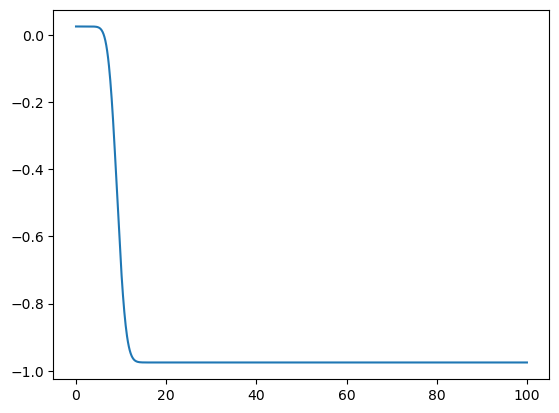

In [65]:
stats.nct.cdf(c,31,delta)
stats.nct.ppf(.975,31,delta)/3/(32)**.5
n=32
alpha=.05

def equation(x):
    return stats.nct.cdf(c, n-1, x) - (1 - alpha/2)

def equation2(x):
    return stats.nct.cdf(c, n-1, x) - ( alpha/2)

print(optimize.root_scalar(equation, bracket=[0, c*10]).root/3/(n)**.5)
print(optimize.root_scalar(equation2, bracket=[0, c*10]).root/3/(n)**.5)
# print(stats.nct.ppf(alpha/2, n-1, c) / np.sqrt(n))

#     CPLL = stats.nct.ppf(alpha/2, n-1, delta) / np.sqrt(n)
#     CPLU = optimize.root_scalar(equation, bracket=[0, 10]).root
x=np.linspace(0,100,1000)
y=[]
for i in x:
    y.append(equation(i))

plt.plot(x,y)
dec=True
for i in range(1,len(y)):
    if y[i]>y[i-1]:
        dec=False
print(dec)

lower_end=100
higher_end=0
while round(lower_end,5)!=round(higher_end,5):
    mid=(lower_end+higher_end)/2
    if equation(mid)>0:
        higher_end=mid
    else:
        lower_end=mid
print(lower_end/3/(n)**.5)

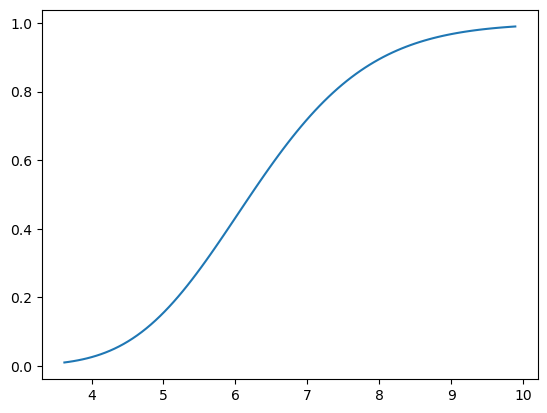

In [24]:
x=np.linspace(stats.nct.ppf(0.01,31,delta),stats.nct.ppf(.99,31,delta),100)
y=stats.nct.cdf(x,31,delta)
plt.plot(x,y)

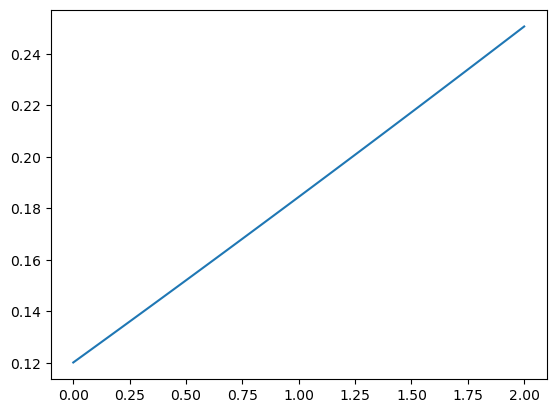

In [29]:
ds=np.linspace(0,2,100)
y=[]
for x in ds:
    y.append(stats.nct.ppf(.975,31,x)/3/(32)**.5)
plt.plot(ds,y)

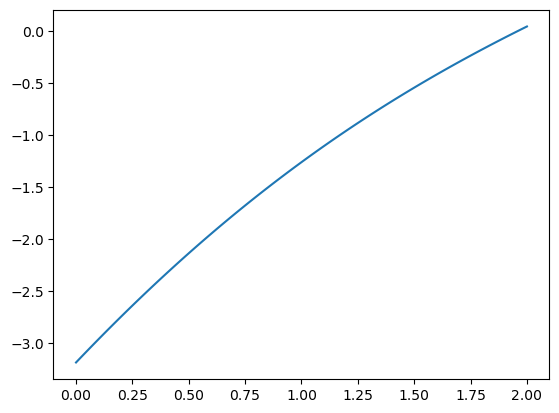

In [35]:
ds=np.linspace(0,2,100)
y=[]
for x in ds:
    y.append(stats.nct.ppf(.025,3,x))
plt.plot(ds,y)

In [2]:
import pandas as pd

# Create a list of tuples from the data
data = [
    ('A', 1, 167),
    ('A', 1, 162),
    ('A', 2, 210),
    ('A', 2, 213),
    ('A', 3, 187),
    ('A', 3, 183),
    ('A', 4, 189),
    ('A', 4, 196),
    ('A', 5, 156),
    ('A', 5, 147),
    ('B', 1, 155),
    ('B', 1, 157),
    ('B', 2, 206),
    ('B', 2, 199),
    ('B', 3, 182),
    ('B', 3, 179),
    ('B', 4, 184),
    ('B', 4, 178),
    ('B', 5, 143),
    ('B', 5, 142),
    ('C', 1, 152),
    ('C', 1, 155),
    ('C', 2, 206),
    ('C', 2, 203),
    ('C', 3, 180),
    ('C', 3, 181),
    ('C', 4, 180),
    ('C', 4, 182),
    ('C', 5, 146),
    ('C', 5, 154)
]

# Create the DataFrame
df = pd.DataFrame(data, columns=['Group', 'Subgroup', 'Value'])

# Display the DataFrame
print(df)

   Group  Subgroup  Value
0      A         1    167
1      A         1    162
2      A         2    210
3      A         2    213
4      A         3    187
5      A         3    183
6      A         4    189
7      A         4    196
8      A         5    156
9      A         5    147
10     B         1    155
11     B         1    157
12     B         2    206
13     B         2    199
14     B         3    182
15     B         3    179
16     B         4    184
17     B         4    178
18     B         5    143
19     B         5    142
20     C         1    152
21     C         1    155
22     C         2    206
23     C         2    203
24     C         3    180
25     C         3    181
26     C         4    180
27     C         4    182
28     C         5    146
29     C         5    154


In [3]:
from cpk import cpk
cpk(df["Value"],10,250,120)

LSL = 10
USL = 250
Target = 120
mean = 175.800
Within Sigma = 13.009
Overall Sigma = 21.570
N = 30
N Subgroups = 0
Stability Index = 1.658

Within alpha = 0.05
Cpk	Est: 1.901	Lower: 1.269	Upper: 2.534
Cpl	Est: 4.248	Lower: 2.866	Upper: 5.628
Cpu	Est: 1.901	Lower: 1.273	Upper: 2.527
Cp	Est: 3.075	Lower: 2.079	Upper: 4.070
Cpm	Est: 0.640
Overall alpha = 0.05
Cpk	Est: 1.147	Lower: 0.828	Upper: 1.465
Cpl	Est: 2.562	Lower: 1.894	Upper: 3.227
Cpu	Est: 1.147	Lower: 0.828	Upper: 1.462
Cp	Est: 1.854	Lower: 1.379	Upper: 2.328
Cpm	Est: 0.613


{'LSL': 10,
 'USL': 250,
 'Target': 120,
 'mean': 175.8,
 'Within Sigma': 13.008545228282673,
 'Overall Sigma': 21.57009423987854,
 'N': 30,
 'N Subgroups': 0,
 'Stability Index': 1.658148075849533,
 'Within': {'cp': 3.0749018662773726,
  'cpl': 4.24848941190657,
  'cpu': 1.9013143206481753,
  'cpk': 1.9013143206481753,
  'cpm': 0.639948610631784,
  'cp_l': 2.078746703790463,
  'cp_u': 4.069959434600852,
  'cpk_u': 2.534088203979916,
  'cpk_l': 1.2685404373164344,
  'cpm_u': 0.6912110572673356,
  'cpm_l': 0.5886320718701639,
  'cpl_l': 2.8664986193333575,
  'cpl_u': 5.628101781510879,
  'cpu_l': 1.2728810962204578,
  'cpu_u': 2.5271977413080924},
 'Overall': {'cp': 1.8544193435209229,
  'cpl': 2.562189392964742,
  'cpu': 1.1466492940771038,
  'cpk': 1.1466492940771038,
  'cpm': 0.6129091495983586,
  'cp_l': 1.3794528040430896,
  'cp_u': 2.328482170651347,
  'cpk_u': 1.4649413419048891,
  'cpk_l': 0.8283572462493185,
  'cpm_u': 0.6892150705807422,
  'cpm_l': 0.5364861628105992,
  'cpl_l

In [77]:
a,b,c=sorted([2,1,3])
print(a,b,c)

1 2 3


LSL = 18
USL = 22
Target = 20
mean = 20.397
Within Sigma = 1.012
Overall Sigma = 1.475
N = 32
N Subgroups = 0
Stability Index = 1.458
Within sigma estimated by averge moving range.

 Within alpha = 0.05
Cpk	Est: 0.528	Lower: 0.325	Upper: 0.731
Cpl	Est: 0.789	Lower: 0.514	Upper: 1.061
Cpu	Est: 0.528	Lower: 0.324	Upper: 0.728
Cp	Est: 0.659	Lower: 0.452	Upper: 0.865
Cpm	Est: 0.613

 Overall (AKA Ppk in JMP) alpha = 0.05
Cpk	Est: 0.362	Lower: 0.216	Upper: 0.509
Cpl	Est: 0.542	Lower: 0.363	Upper: 0.717
Cpu	Est: 0.362	Lower: 0.214	Upper: 0.507
Cp	Est: 0.452	Lower: 0.340	Upper: 0.564
Cpm	Est: 0.436

 Nonconformance (Observation and Expected)
Below LSL Obs. 6.25%	Exp. Within 0.89%	Exp. Overall 5.21%
Above USL Obs. 15.62%	Exp. Within 5.66%	Exp. Overall 13.86%
Total Out Obs. 21.88%	Exp. Within 6.55%	Exp. Overall 19.06%


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:7313: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


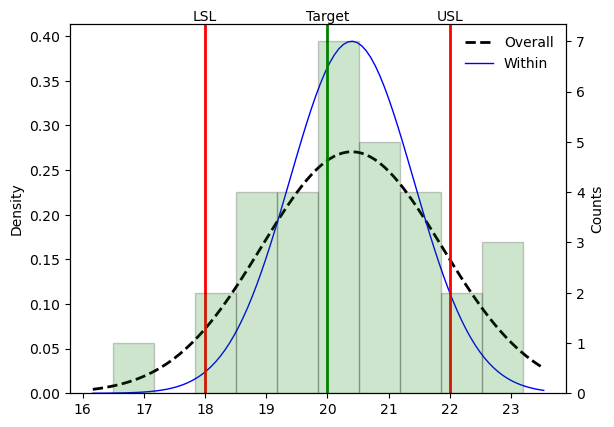

In [1]:
data = [18.5, 21.2, 19.4, 16.5, 17.9, 19.0, 20.3, 21.2, 19.6, 19.8, 20.4, 20.5, 
          22.2, 21.5, 20.8, 20.3, 19.1, 20.6, 20.8, 21.6, 22.8, 22.2, 23.2, 23.0, 
          19.0, 20.5, 20.3, 19.2, 20.7, 21.0, 20.5, 19.1]

from cpk_plot import cpk_plot
_=cpk_plot(data,18,20,22)